In [113]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='viUZ2aWNu2A5HKJwwoFeBv3o1hc33ylVNgTIfP9VsQvj',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'airlinepassengersatisfactionmodel-donotdelete-pr-tiupqov5fjetd6'
object_key = 'train.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 4]

In [114]:
df.drop('id',axis=1)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [115]:
df.shape

(103904, 25)

In [116]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [117]:
target_encoding = {'neutral or dissatisfied':0,'satisfied':1}
df['satisfaction']= df['satisfaction'].map(target_encoding).astype('float64')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [119]:
df.dropna(inplace=True)

In [120]:
#Visualiztion

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>],
       [<AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>],
       [<AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>,
     

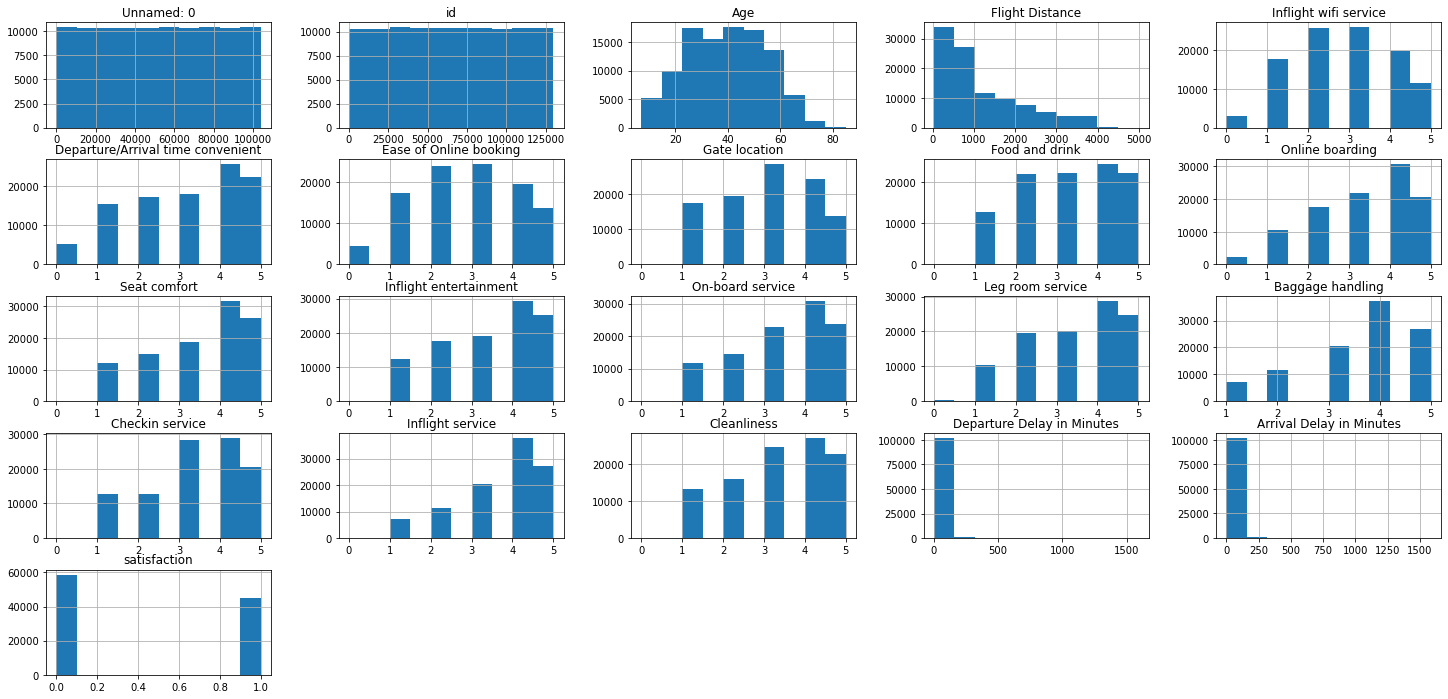

In [121]:
df.hist(figsize=(25,12))

In [122]:
df['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

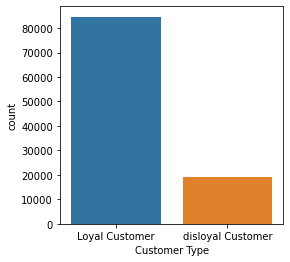

In [123]:
sns.countplot(data=df,x=df['Customer Type'])

<AxesSubplot:xlabel='Food and drink', ylabel='Age'>

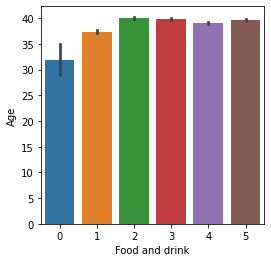

In [124]:
sns.barplot(data=df,x='Food and drink',y='Age',orient='v')

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

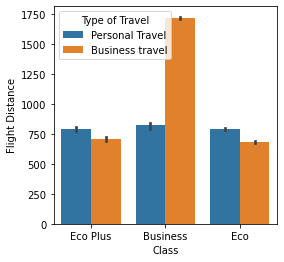

In [125]:
sns.barplot(data=df,x='Class',y='Flight Distance',orient='v',hue='Type of Travel')

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

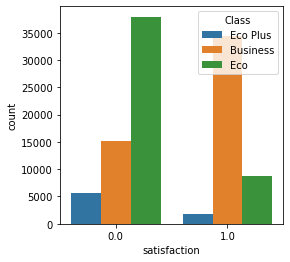

In [126]:
sns.countplot(
            x=df['satisfaction'],
            hue=df['Class'],
            data=df
            )

<AxesSubplot:>

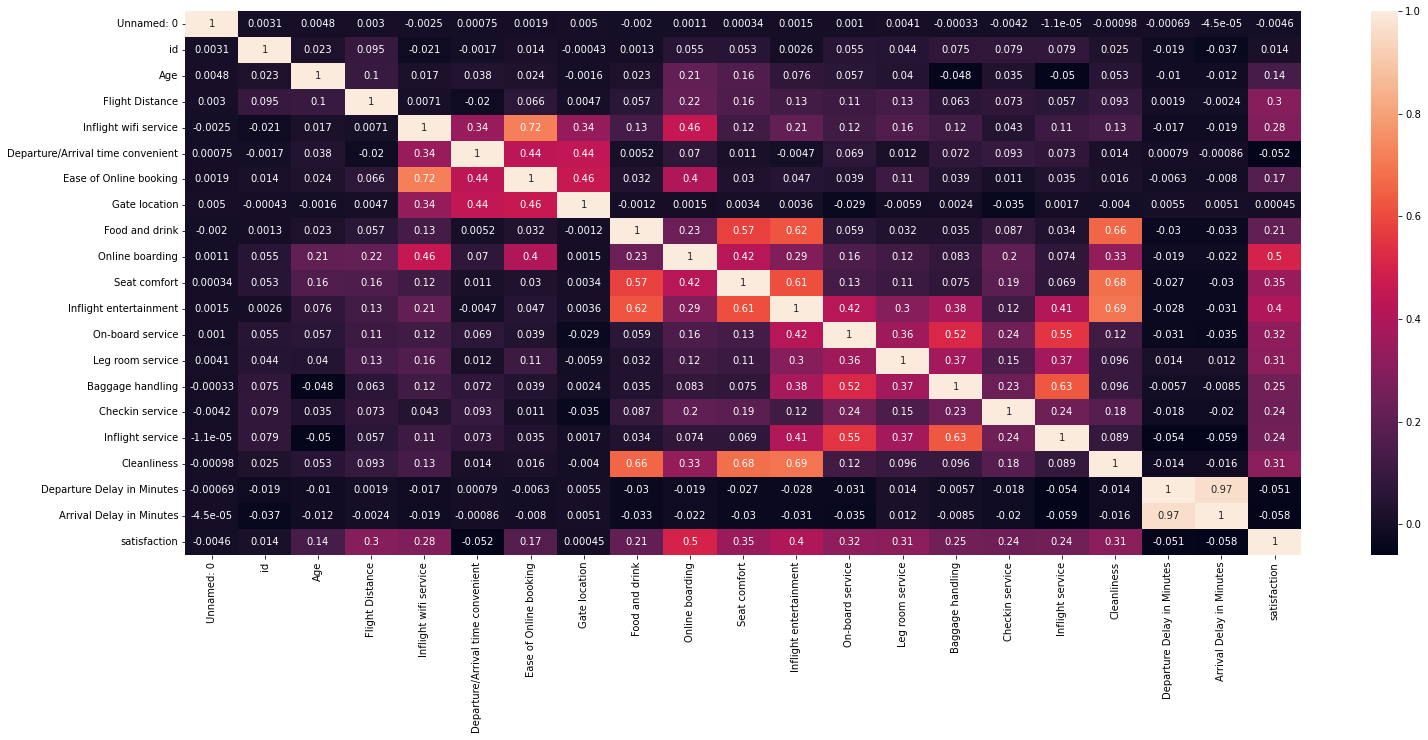

In [127]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [128]:
gender_map = {'Female':0,'Male':1}
df.Gender = df.Gender.map(gender_map)

In [129]:
tmap = {'Loyal Customer':1,'disloyal Customer':0}
df['Customer Type'] = df['Customer Type'].map(tmap)
df['Customer Type'].dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Customer Type                      103594 non-null  int64  
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [130]:
tmap = {'Business travel':1,'Personal Travel':0}

df['Type of Travel'] = df['Type of Travel'].map(tmap)
df['Type of Travel'].dtypes

dtype('int64')

In [131]:
cmap = {'Business':2,'Eco':0,'Eco Plus':1}

df['Class'] = df['Class'].map(cmap)
df['Class'].dtypes

dtype('int64')

In [132]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('float64')

In [133]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [134]:
#Splitting and training dataset

In [135]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [136]:
X=X.drop('id',axis=1)
X=X.drop('Unnamed: 0',axis=1)


In [137]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,0,1,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,1,2,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,1,2,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,1,2,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest object
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_rf = rf_model.predict(X_test)

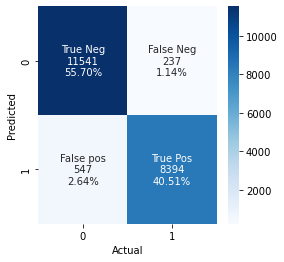

0.9621603359235484
[[11541   237]
 [  547  8394]]


In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
group_names = ['True Neg','False Neg','False pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_test,y_pred_rf) .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test,y_pred_rf).flatten()/np.sum(confusion_matrix(y_test,y_pred_rf))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest object
rf_model1 = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf_model1.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_rf = rf_model1.predict(X_test)

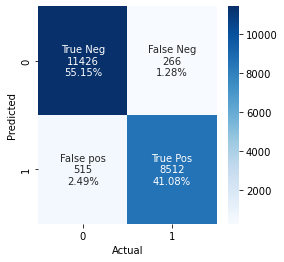

0.962305130556494
[[11426   266]
 [  515  8512]]


In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
group_names = ['True Neg','False Neg','False pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_test,y_pred_rf) .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test,y_pred_rf).flatten()/np.sum(confusion_matrix(y_test,y_pred_rf))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

In [141]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     11692
         1.0       0.97      0.94      0.96      9027

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



In [69]:
#deployment


In [142]:
!pip install -U ibm-watson-machine-learning

In [143]:
from ibm_watson_machine_learning import APIClient

In [144]:
wml_credentials = {
    "apikey":"yNkOYWxrGXRAtuYDx4YNTpzTvZZSqsR02u5A1g4cRp1v",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [147]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------  ------------------------
ID                                    NAME              CREATED
fb6651b6-d624-4d35-8c10-bbdb94bf545e  Airline_1_deploy  2023-05-15T10:56:30.414Z
0ca5a170-7410-4f1f-841c-7d0435024a78  Airline_deploy    2023-05-15T10:29:03.571Z
------------------------------------  ----------------  ------------------------


,ID,NAME,CREATED
0,fb6651b6-d624-4d35-8c10-bbdb94bf545e,Airline_1_deploy,2023-05-15T10:56:30.414Z
1,0ca5a170-7410-4f1f-841c-7d0435024a78,Airline_deploy,2023-05-15T10:29:03.571Z


In [148]:
space_id = "fb6651b6-d624-4d35-8c10-bbdb94bf545e"

In [149]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [150]:
wml_client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  deprecated          pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,deprecated,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [151]:
MODEL_NAME = 'DemoModel'
DEPLOYMENT_NAME = 'Airline_1_deploy'
DEMO_MODEL = rf_model1

In [152]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [153]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [154]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

Note: Warnings!! :  Software specification runtime-22.1-py3.9 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.2-py3.10 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [155]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'satisfaction',
  'schemas': {'input': [{'fields': [{'name': 'Gender', 'type': 'int64'},
      {'name': 'Customer Type', 'type': 'int64'},
      {'name': 'Age', 'type': 'int64'},
      {'name': 'Type of Travel', 'type': 'int64'},
      {'name': 'Class', 'type': 'int64'},
      {'name': 'Flight Distance', 'type': 'int64'},
      {'name': 'Inflight wifi service', 'type': 'int64'},
      {'name': 'Departure/Arrival time convenient', 'type': 'int64'},
      {'name': 'Ease of Online booking', 'type': 'int64'},
      {'name': 'Gate location', 'type': 'int64'},
      {'name': 'Food and drink', 'type': 'int64'},
      {'name': 'Online boarding', 'type': 'int64'},
      {'name': 'Seat comfort', 'type': 'int64'},
      {'name': 'Inflight entertainment', 'type': 'int64'},
      {'name': 'On-board service', 'type': 'int64'},
      {'name': 'Leg room service', 'type': 'int64'},
      {'name': 'Baggage handling', 'type': 'int64'},
 

In [156]:
model_id=wml_client.repository.get_model_id(model_details)

In [157]:
model_id


'283a28e5-077b-45c2-9e50-1be9f7ce51fb'

In [158]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [159]:
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '283a28e5-077b-45c2-9e50-1be9f7ce51fb' started

#######################################################################################


initializing
Note: Software specification runtime-22.1-py3.9 is deprecated. Use supported software specification and corresponding model type instead when saving a model and deploy. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='eacb7870-14d2-405a-b762-949b06bfa9e4'
------------------------------------------------------------------------------------------------


